<a href="https://colab.research.google.com/github/Katleho10/Financial-inclusion/blob/main/Financial_inclusion_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of contents
1. Defining the problem statement
2. Imports
3. Exploratory data analysis
4. Label Encoding
5. Feature scaling
6. Sampling technique
7. Model building


### 1. Defining the problem statement
The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account.

In [ ]:
### 2. IMPORT DATA WRANGLERS: PANDAS AND NUMPY
import numpy as np
import pandas as pd
import sweetviz


#IMPORT VISUALIZATION LIBRARY
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')         #Ignoring warnings

In [ ]:
# INGEST THE DATA

url_train = 'https://raw.githubusercontent.com/Mikovhe/Datasets/main/FIA/data/Train_v2.csv'

url_test = 'https://raw.githubusercontent.com/Mikovhe/Datasets/main/FIA/data/Test_v2.csv'

sub = 'https://raw.githubusercontent.com/Mikovhe/Datasets/main/FIA/data/SubmissionFile.csv'


train = pd.read_csv(url_train)
test=pd.read_csv(url_test )
submission=pd.read_csv(sub)

### Variable Definitions
* Country- Country interviewee is in.
* Year-Year survey was done in.
* Uniqueid-Unique identifier for each interviewee
* Location_type-Type of location: Rural, Urban
* Cellphone_access-If interviewee has access to a cellphone: Yes, No
* Household_size-Number of people living in one house
* Age_of_respondent-The age of the interviewee
* Gender_of_respondent-Gender of interviewee: Male, Female
* Relationship_with_head-The interviewees relationship with the head of the house:Head of Household, Spouse, Child, Parent,   Other relative, Other non-relatives, Dont know
* Marital_status-The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never       Married, Don't know
* Education_level	Highest level of education-No formal education, Primary education, Secondary education,              Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
* Job_type-Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed       Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


In [ ]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
train.shape,test.shape

((23524, 13), (10086, 12))

## 3. Exploratory Data Analysis (EDA)

In [ ]:
train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [ ]:
test.nunique()

country                      4
year                         3
uniqueid                  7313
location_type                2
cellphone_access             2
household_size              18
age_of_respondent           83
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

* Investigate more on the uniqueid.

In [ ]:
train.drop('uniqueid',inplace=True,axis=1)

In [ ]:
test.drop('uniqueid',inplace=True,axis=1)

In [ ]:
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "bank_account")

                                             |                                             | [  0%]   00:03 ->…

In [ ]:
my_report.show_html("Report.html", open_browser=False)

Report Report.html was generated.



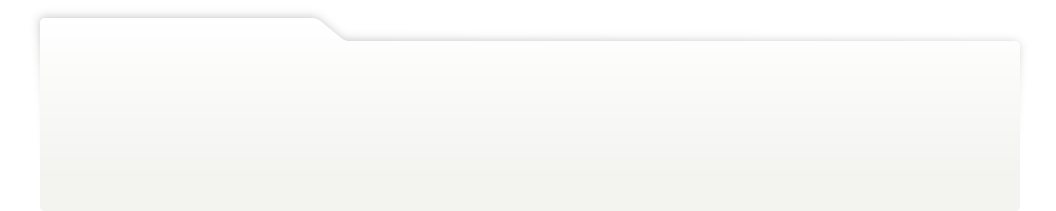
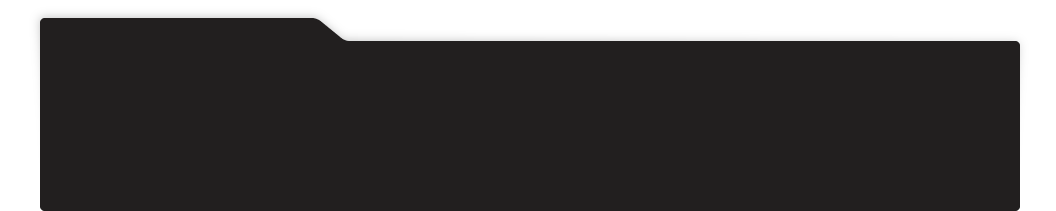
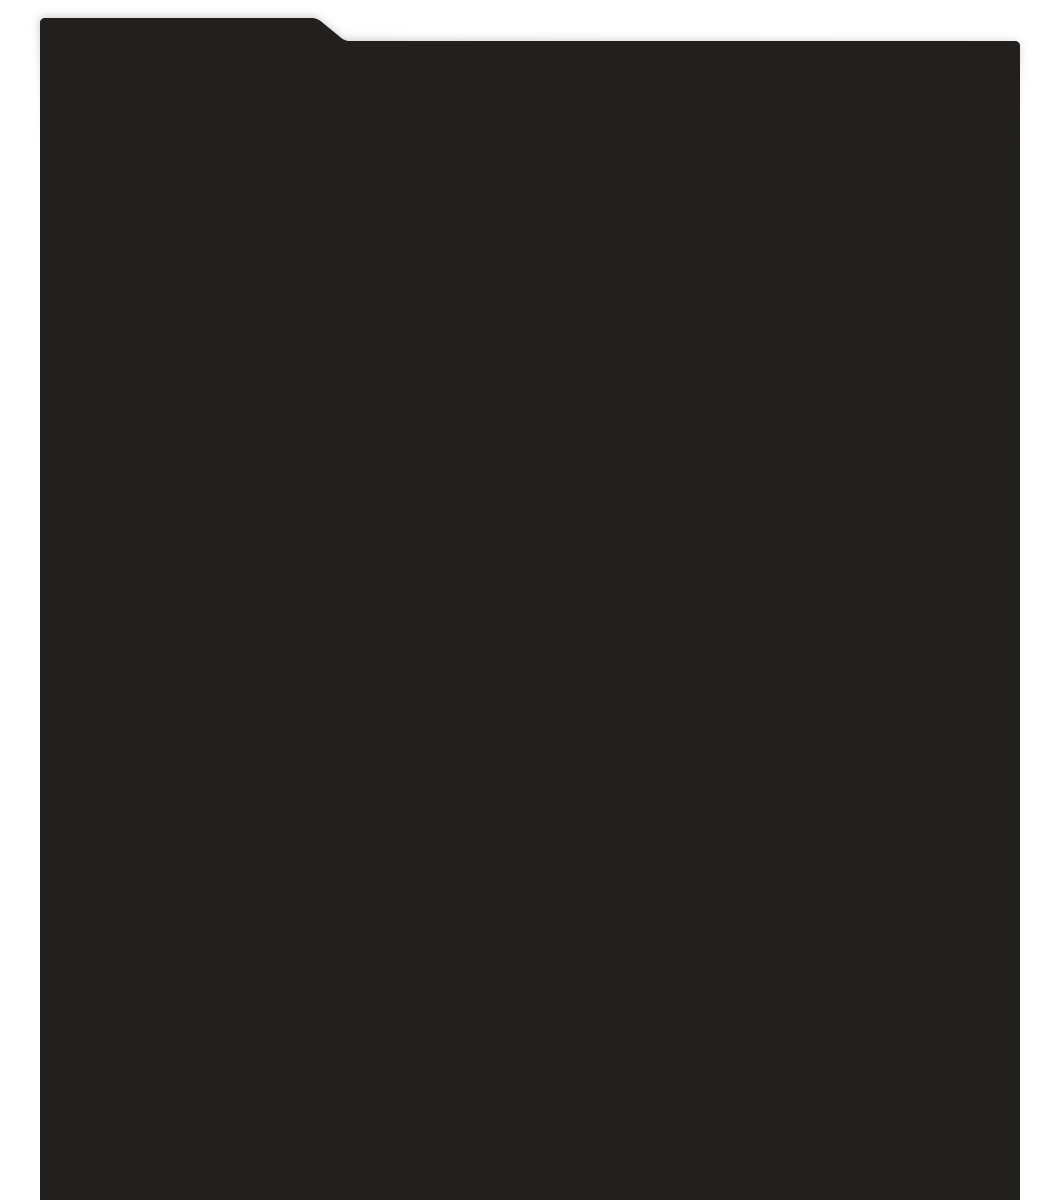
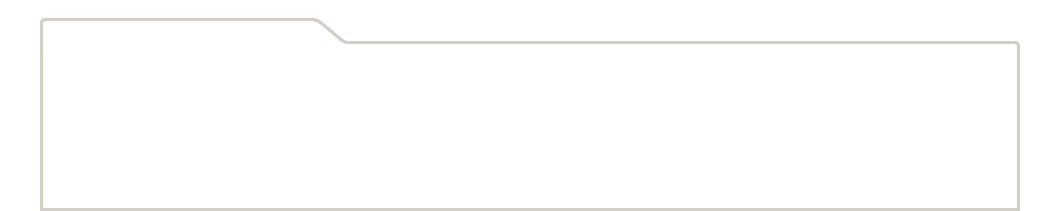
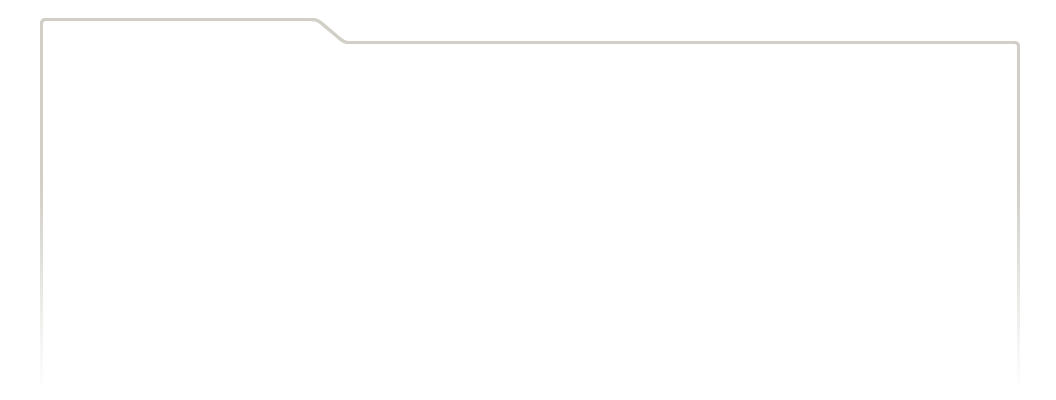
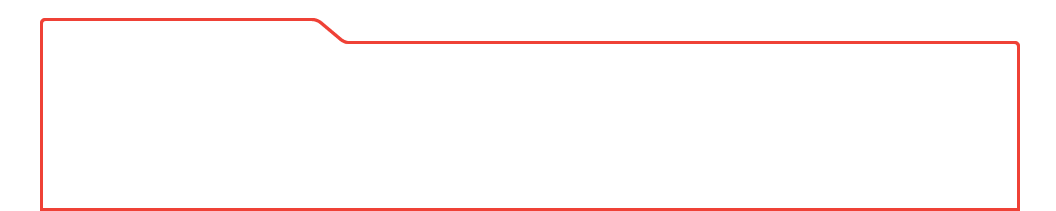
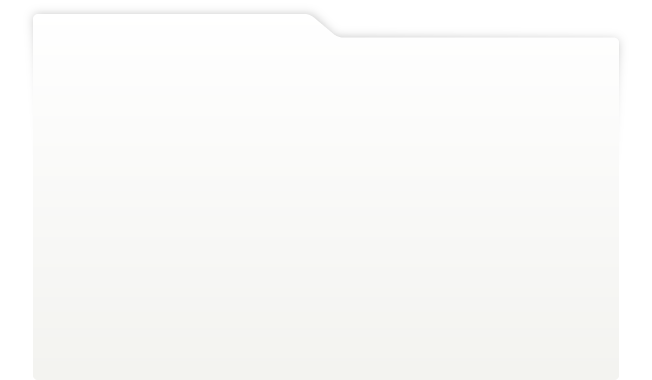
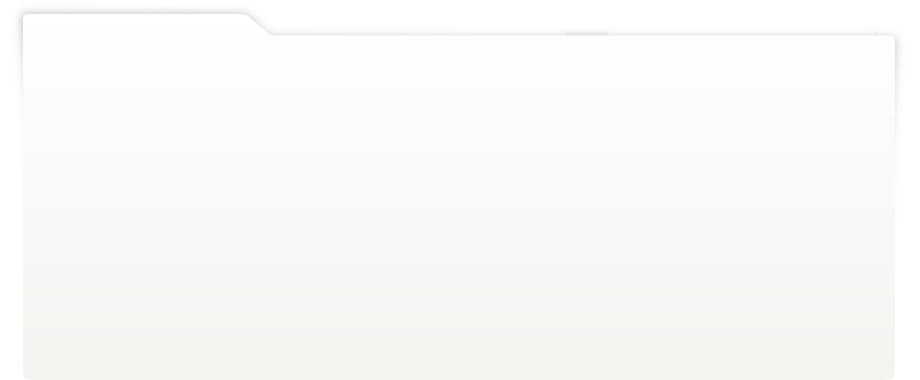
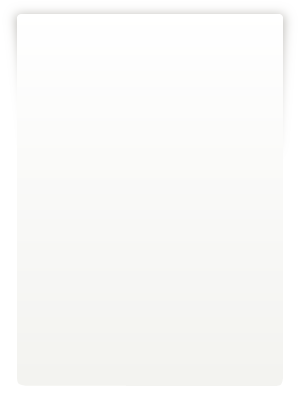
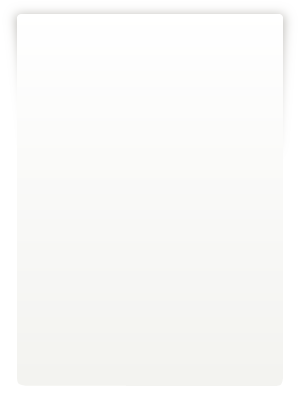
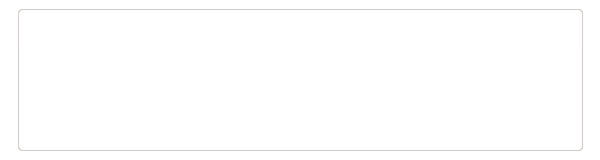
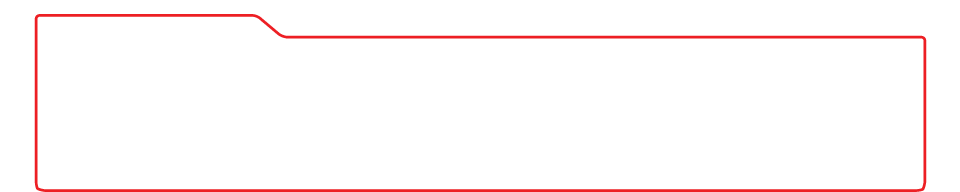
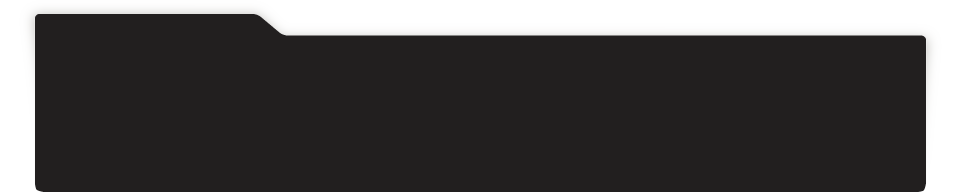
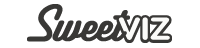
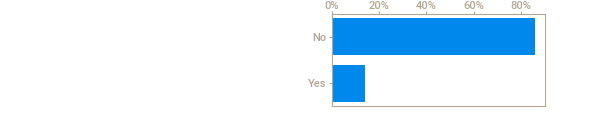
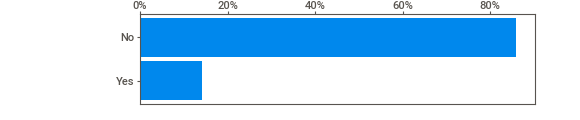
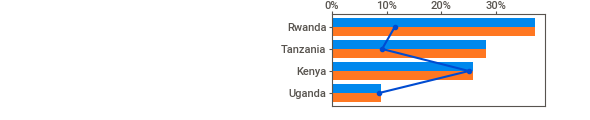
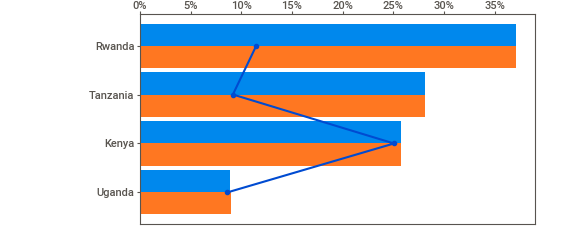
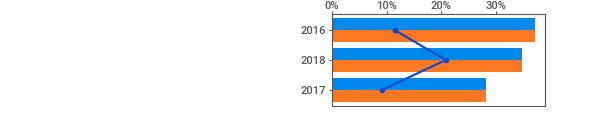
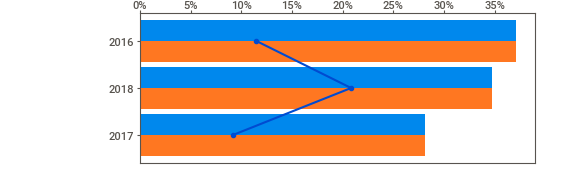
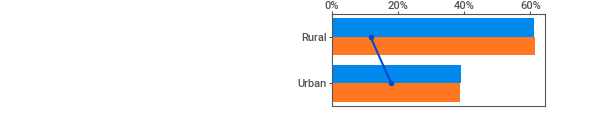
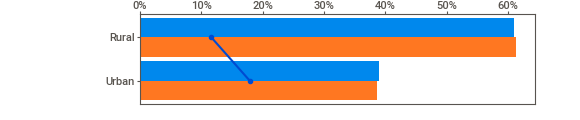
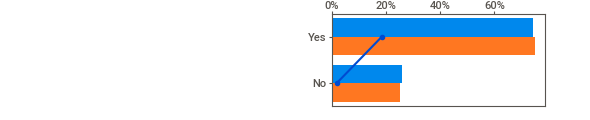
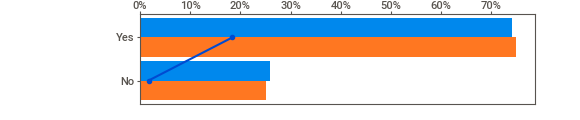
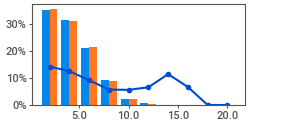
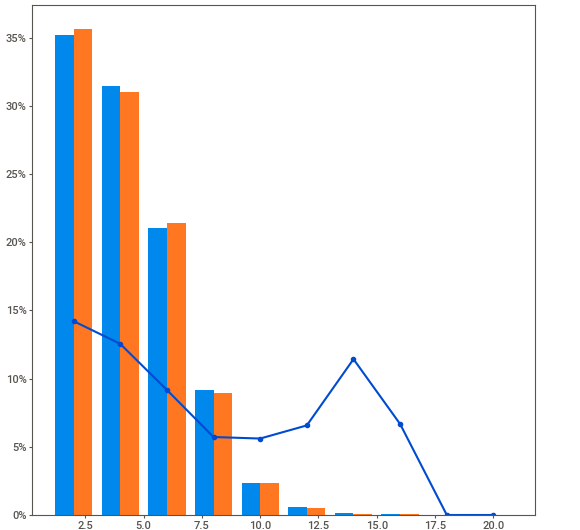
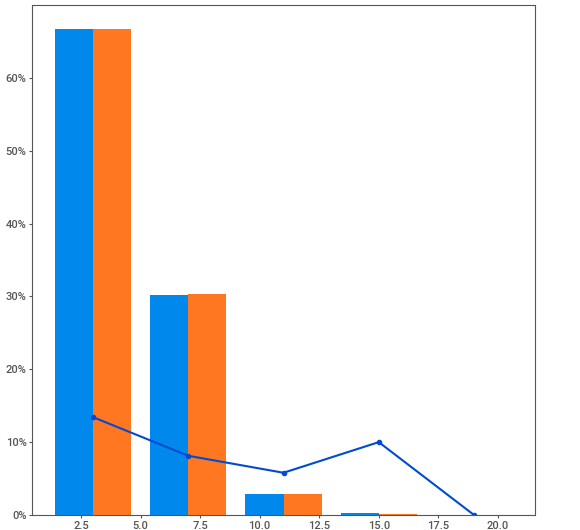
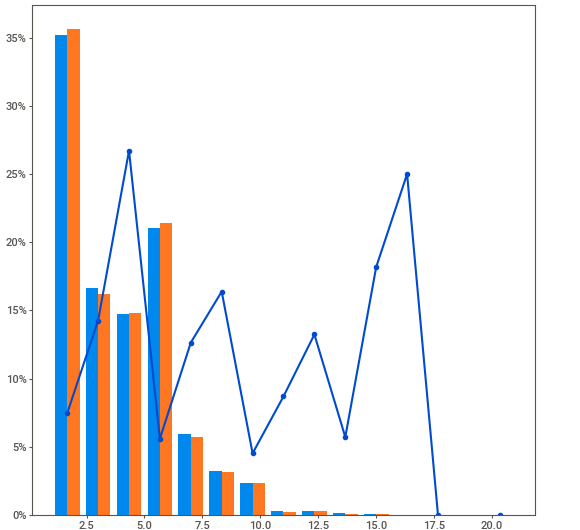
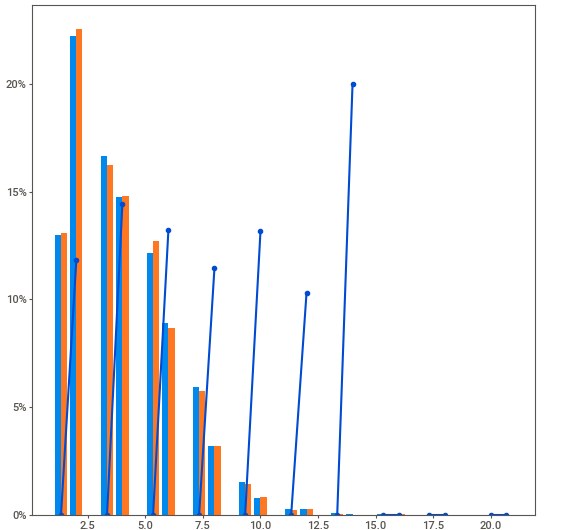
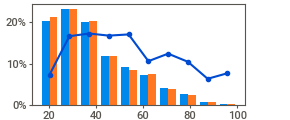
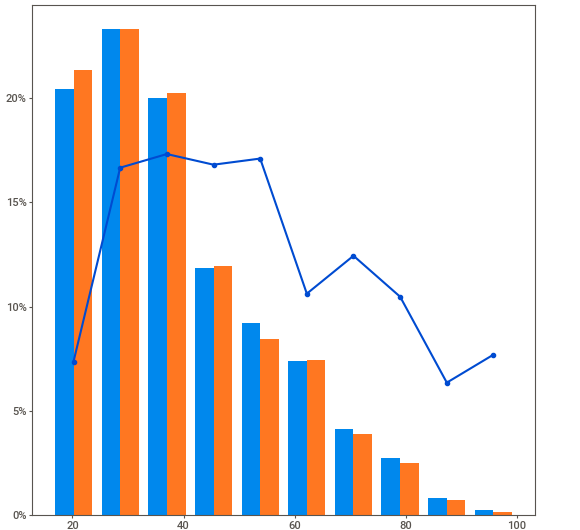
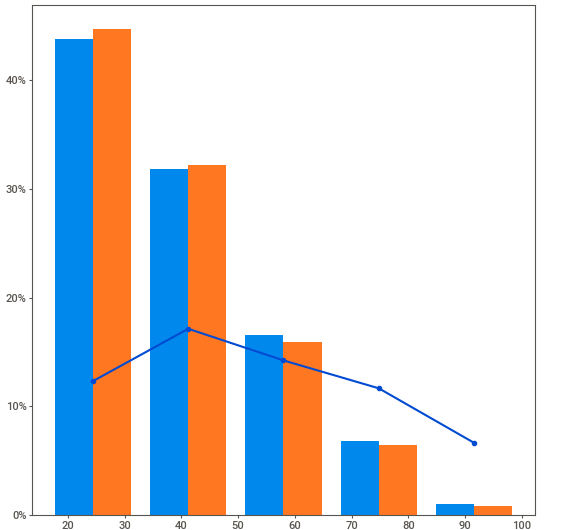
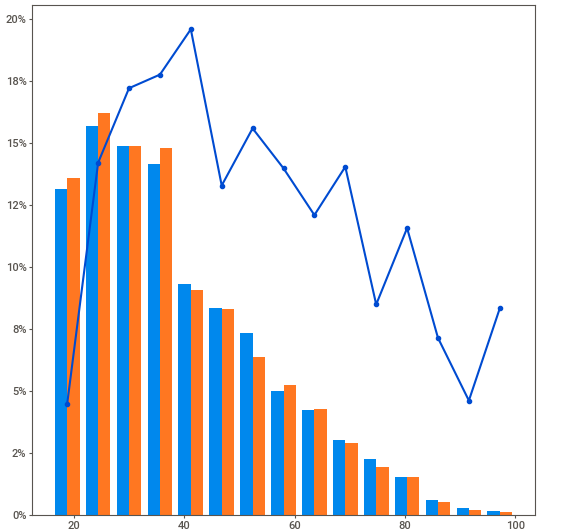
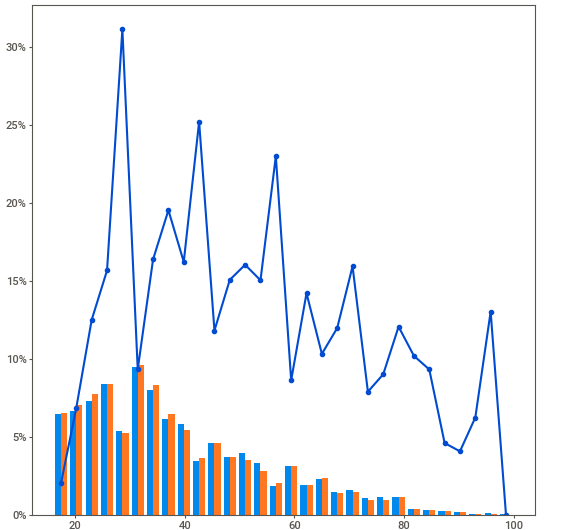
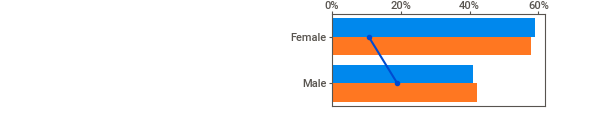
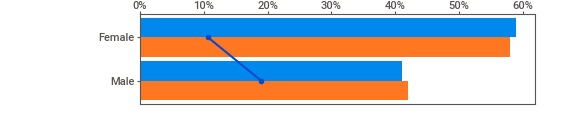
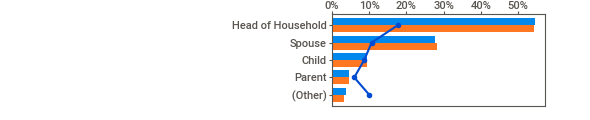
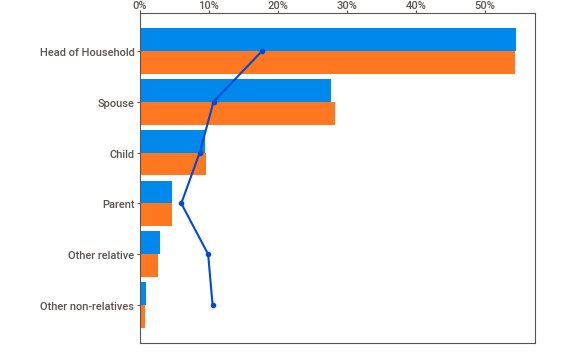
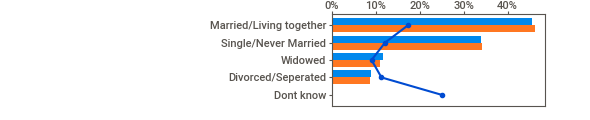
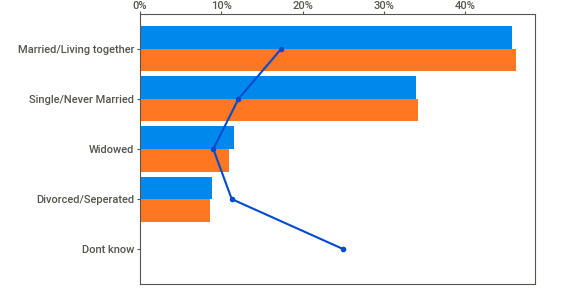
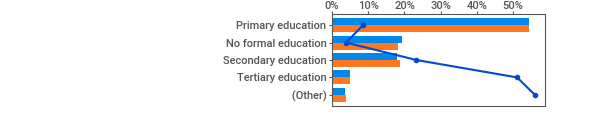
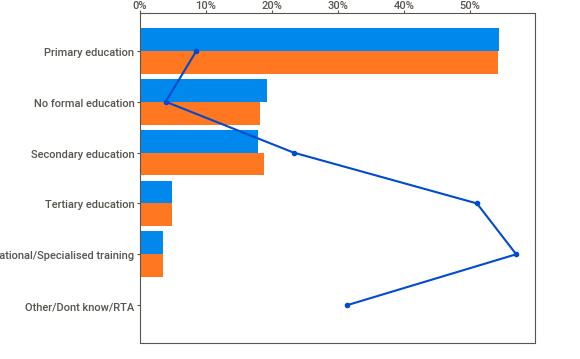
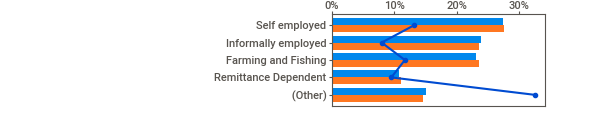
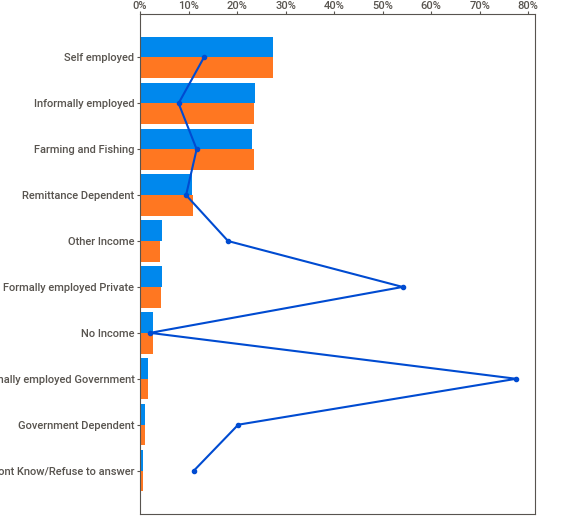
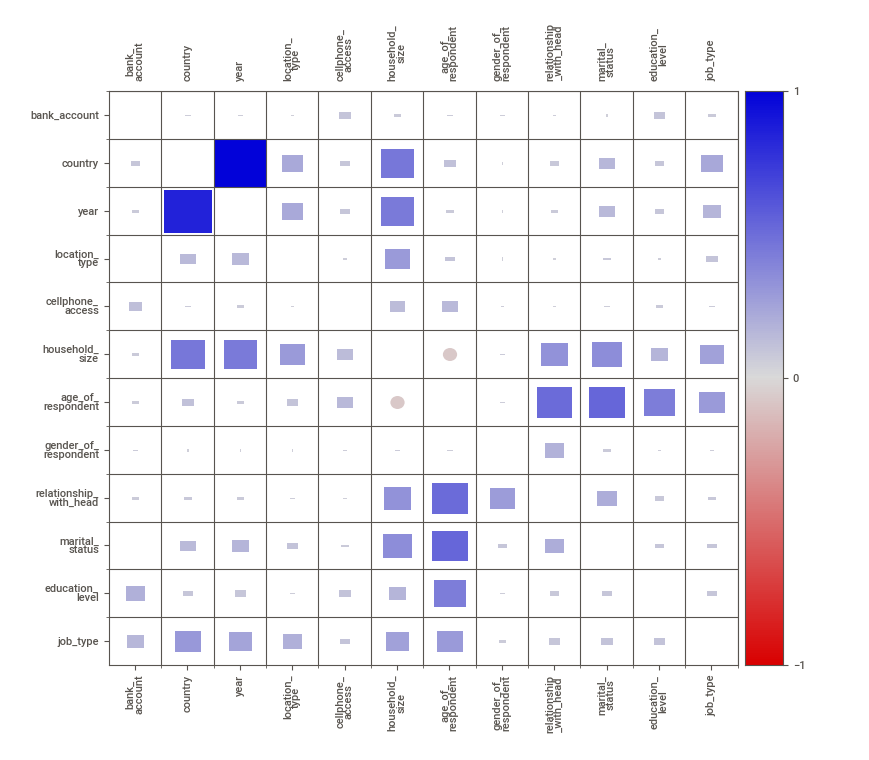
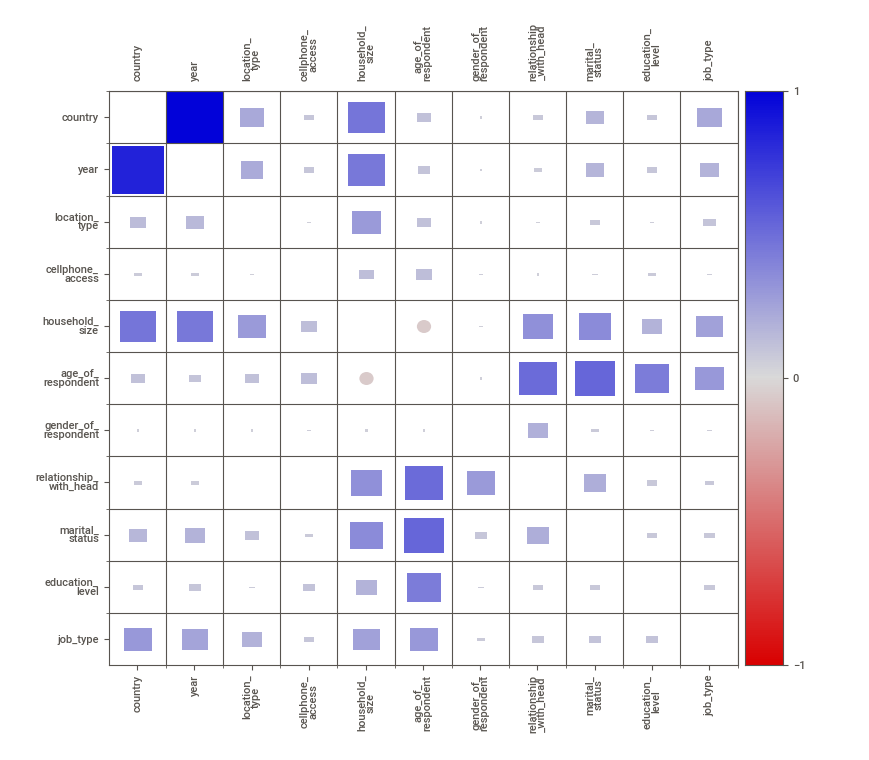

In [ ]:
import IPython
IPython.display.HTML("Report.html")

In [ ]:
# Link to report, showing summary of exploratory data analysis
 file:///C:/Users/Katleho%20Ramonotsi/Report.html

### 4. Label encodding

#### Encoding Categorical Variables

A machine learning model  cannot deal with categorical variables. Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. 

One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

In [ ]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training data
            train[col] = le.transform(train[col])
           
        
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in test:
    if test[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(test[col].unique())) <= 2:
            # Train on the test data
            le.fit(test[col])
            # Transform test data
            test[col] = le.transform(test[col])
     
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,1,3,30,1,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,1,1,7,51,1,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,0,0,3,77,0,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,0,0,6,39,0,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,1,0,3,16,1,Child,Single/Never Married,Secondary education,Remittance Dependent


In [ ]:
train.shape,test.shape

((23524, 12), (10086, 11))

In [ ]:
### One hot encodding

In [ ]:
train.sample(4)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
5939,Kenya,2018,0,0,0,3,25,0,Head of Household,Widowed,Primary education,Farming and Fishing
22340,Uganda,2018,0,0,1,3,35,1,Head of Household,Married/Living together,Secondary education,Self employed
13689,Rwanda,2016,0,0,1,6,36,0,Spouse,Married/Living together,Primary education,Farming and Fishing
13916,Rwanda,2016,0,0,1,4,35,1,Head of Household,Married/Living together,Primary education,Informally employed


In [ ]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (23524, 38)
Testing Features shape:  (10086, 37)


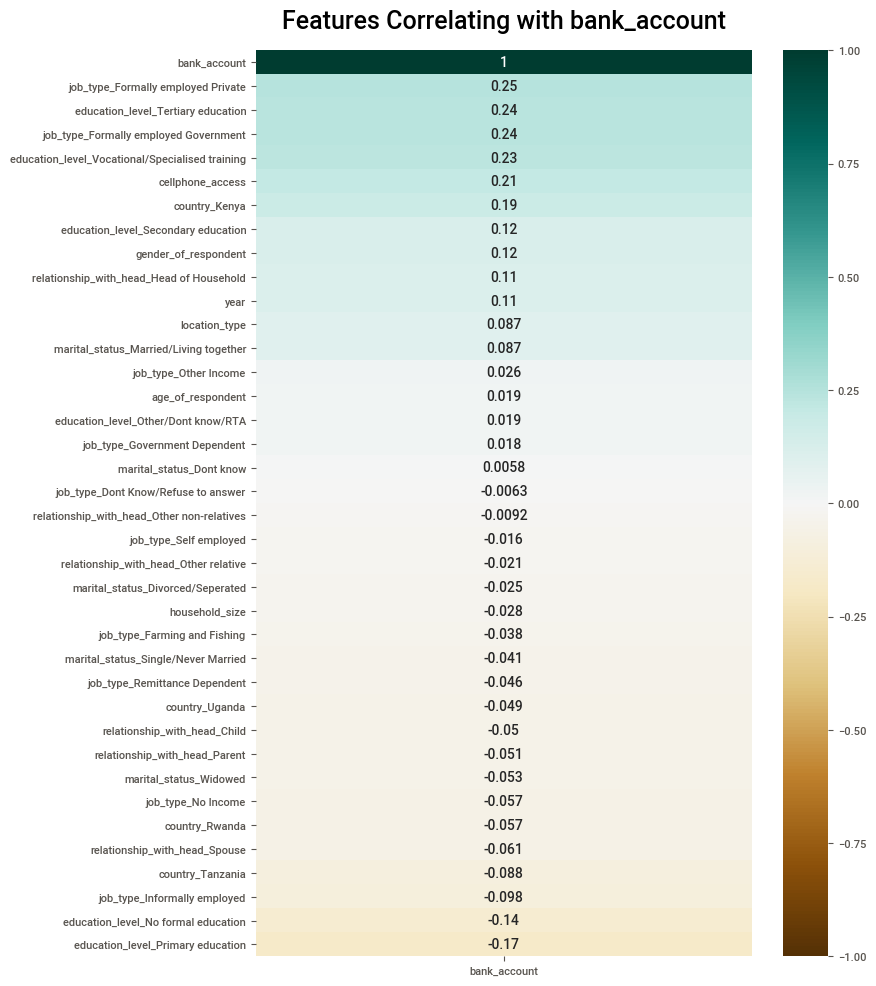

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['bank_account']].sort_values(by='bank_account', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with bank_account', fontdict={'fontsize':18}, pad=16);

In [ ]:
train.columns

Index(['year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'country_Kenya', 'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to ans

In [ ]:
train.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,1,0,1,3,24,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,0,5,70,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,1,1,1,5,26,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,0,0,1,5,34,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,0,1,0,8,26,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,1,1,3,30,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,1,1,7,51,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2018,0,0,3,77,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,0,0,6,39,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,1,0,3,16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 5.Feature scaling

In [ ]:
#Now lets scale our data.
#as they are nit in range 0-1
#We will use min-max or normalization.
cols_to_scale = ['year','household_size','age_of_respondent']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])
test[cols_to_scale] = scaler.fit_transform(test[cols_to_scale])

In [ ]:
train.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,1,0,1,0.10,0.095238,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,0.20,0.642857,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1,1,1,0.20,0.119048,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0,0,1,0.20,0.214286,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,0,1,0,0.35,0.119048,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
test.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,1,1,0.105263,0.166667,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,1,1,0.315789,0.416667,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0,0,0.105263,0.726190,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,0,0,0.263158,0.273810,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1,0,0.105263,0.000000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train.shape,test.shape

((23524, 38), (10086, 37))

In [ ]:
from sklearn.model_selection import train_test_split
X = train.drop('bank_account',axis=1)
y = train['bank_account']

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int32

### 6. Sampling technique

* I am going to use oversampling technique because our target does not have alot of classess
* Oversampling means duplicating samples from minority class

In [ ]:
### SMOTE technique(Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy ='minority')
x_sm, y_sm = smote.fit_resample(X,y)

In [ ]:
y_sm.value_counts() #Now our dataset is balanced.

0    20212
1    20212
Name: bank_account, dtype: int64

In [ ]:
x_sm.shape, y_sm.shape

((40424, 37), (40424,))

In [ ]:
x_sm.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,0,1,0.10,0.095238,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0.20,0.642857,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1,1,0.20,0.119048,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0,1,0.20,0.214286,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,0,0.35,0.119048,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Original vs Resampled dataset
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Original dataset shape Counter({0: 20212, 1: 3312})
Resampled dataset shape Counter({1: 20212, 0: 20212})


### 7. Model building

In [ ]:
#Train-Test split to evaluate perfomance of our ML algorithm
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [ ]:
y_train.value_counts() #balanced train dataset

1    16170
0    16169
Name: bank_account, dtype: int64

In [ ]:
y_test.value_counts() #balanced test dataset

0    4043
1    4042
Name: bank_account, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression  

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.798886827458256

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [ ]:
# f1 score
f1_score(y_test, smote_pred)

0.794541319181198

In [ ]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,3315,728
1,898,3144


In [ ]:
recall_score(y_test, smote_pred)

0.7778327560613557

## References

The data source for this illustration was dowloaded from **Zindi**, an african platform for machine learning competitions. The use of this document is for teaching purposes.